In [1]:
import cv2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('C:\lecture\lena.jpg', 0)

In [4]:
img.shape

(512, 512)

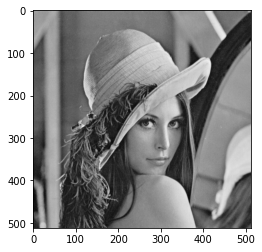

In [5]:
plt.imshow(img, cmap="gray")

In [6]:
img[100,100] = 255

In [7]:
cv2.line(img, (0,0), (100,100), (255,255,255), 1)
cv2.putText(img, 'Lena', (100,100), 1, 1, (255,255,255))

array([[255, 162, 161, ..., 170, 154, 130],
       [162, 255, 162, ..., 173, 155, 126],
       [162, 162, 255, ..., 170, 155, 128],
       ...,
       [ 43,  42,  51, ..., 103, 101,  99],
       [ 41,  42,  55, ..., 103, 105, 106],
       [ 42,  44,  57, ..., 102, 106, 109]], dtype=uint8)

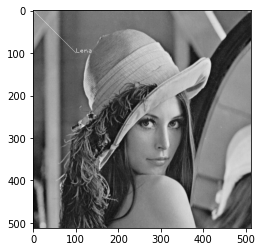

In [8]:
plt.imshow(img, cmap="gray")

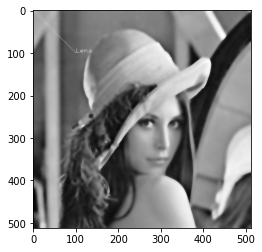

In [13]:
plt.imshow(cv2.bilateralFilter(img, 10, 75, 75), cmap="gray")

In [14]:
img = cv2.imread('C:\lecture\lena.jpg')

In [17]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img2[200:300,:,1] = img2[200:300,:,1] * 1.15
img2 = cv2.cvtColor(img2, cv2.COLOR_HSV2BGR)

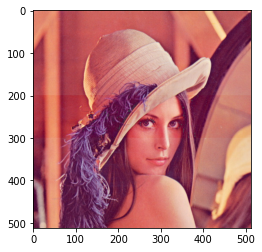

In [18]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

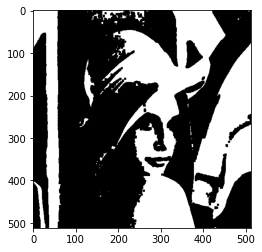

In [19]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.equalizeHist(img2)
_, img2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8) 
img2 = cv2.erode(img2, kernel)
plt.imshow(img2, cmap="gray")

In [20]:
img = cv2.imread('C:\lecture\lena.jpg', 0)

In [22]:
edges = cv2.Canny(img, 50, 100)

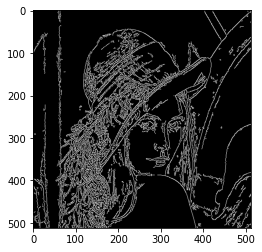

In [23]:
plt.imshow(edges, cmap="gray")

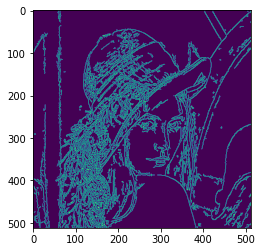

In [24]:
plt.imshow(edges)

In [ ]:
cv2.namedWindow('sample')
cv2.imshow("sample", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

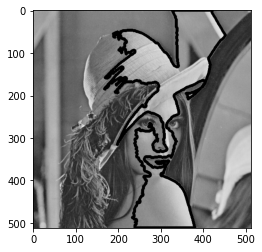

In [25]:
contours, _ = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cv2.drawContours(img, contours, max_index, (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
img = cv2.imread('C:\lecture\lena.jpg',0)
f1 = np.fft.fft2(img)
f2 = np.fft.fftshift(f1)


In [29]:
spectrum = (np.abs(f2))

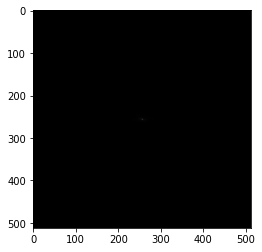

In [30]:
dst = np.array(spectrum,  dtype = np.float32)
img_dst = cv2.normalize(dst,None,0,1,cv2.NORM_MINMAX)
plt.imshow(img_dst, cmap="gray")

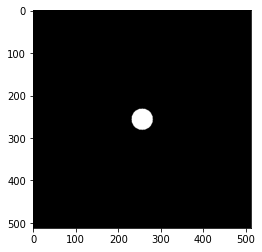

In [31]:
mask = np.zeros(f1.shape, np.uint8)
mask = np.array(mask,  dtype = np.uint8)

k = 0.05
w,h = img.shape
cv2.circle(mask, ((int)(w/2), (int)(h/2)), (int)(w*k), (255,255,255), -1)
plt.imshow(mask, cmap="gray")

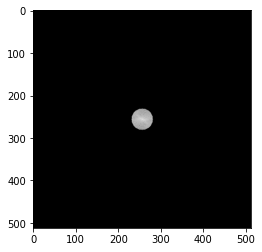

In [32]:
f2[mask==0]=0
spectrum = np.log(np.abs(0.1+f2))

dst = np.array(spectrum,  dtype = np.float32)
img_dst = cv2.normalize(dst,None,0,1,cv2.NORM_MINMAX)
plt.imshow(img_dst, cmap="gray")


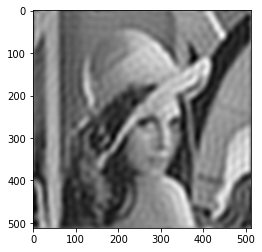

In [33]:
conv_img = np.fft.ifft2(np.fft.ifftshift(f2)).real
img_dst = np.array(conv_img, dtype = np.uint8)
plt.imshow(img_dst, cmap="gray")

In [ ]:
cap = cv2.VideoCapture(0) #"video.avi"
_, prev_img = cap.read()
prev_img = cv2.cvtColor(prev_img, cv2.COLOR_BGR2GRAY)
while True:
  _, img = cap.read()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imshow("video", img)
  #OF
  points = cv2.goodFeaturesToTrack( img, 1000, 0.01, 10)
  points2, st, err = cv2.calcOpticalFlowPyrLK(  img, prev_img, points, None, winSize=(20, 20) )
  
  points = np.int0(points)
  points2 = np.int0(points2)
  
  prev_img = img
  for i, p in enumerate(points):
     x1,y1 = p.ravel()
     x2,y2 = points2[i].ravel()
     cv2.circle(img, (x1,y1), 2, 255)
     cv2.line(img, (x1,y1), (x2,y2), 255, 1)
  
  cv2.imshow("video result", img)
  
  if cv2.waitKey(10) == 32:
      break
  